In [6]:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html
import matplotlib.pyplot as plt
import numpy as np

In [229]:
sol = np.load("/content/drive/MyDrive/PSO_execs/Kacem/exec7/problem1/cof5/solution_aprout2_exec13.npy")

In [254]:
tp = decode(sol)
np.save("sttime.npy", tp[0])
np.save("edtime.npy", tp[1])

In [255]:
start_time = np.load("sttime.npy")
end_time = np.load("edtime.npy")
plot_data = dict_to_plot_of_solution(start_time, end_time)
np.save("plot_data.npy", plot_data)

In [ ]:
decode(sol, True)

In [266]:
def dict_to_plot_of_solution(start_time, end_time):
  operations = {}
  for machine in range( decoder_data["quant_of_machines"] ):
    for operation in range( decoder_data["half_of_scheduling"] ):
      current_start_time      = start_time[machine][operation]
      current_end_time        = end_time[machine][operation]
      current_diference_time  = current_end_time - current_start_time
      operation_tuple = find_machine_of_a_operation(operation)
      operation_data = {
        "id"              : operation,
        "machine"         : operation_tuple[0],
        "operation_tuple" : operation_tuple,
        "start_time"      : current_start_time,
        "duration"        : current_diference_time
      }
      operations[operation] = operation_data
  #
  return operations

In [263]:
plot_data = np.load("plot_data.npy", allow_pickle=True)[()]

In [261]:
print(plot_data)

{0: {'id': 0, 'machine': 4, 'operation_tuple': (1, 1), 'start_time': 0, 'duration': 0}, 1: {'id': 1, 'machine': 4, 'operation_tuple': (1, 2), 'start_time': 0, 'duration': 0}, 2: {'id': 2, 'machine': 4, 'operation_tuple': (1, 3), 'start_time': 0, 'duration': 0}, 3: {'id': 3, 'machine': 4, 'operation_tuple': (2, 1), 'start_time': 0, 'duration': 0}, 4: {'id': 4, 'machine': 4, 'operation_tuple': (2, 2), 'start_time': 2, 'duration': 5}, 5: {'id': 5, 'machine': 4, 'operation_tuple': (2, 3), 'start_time': 0, 'duration': 0}, 6: {'id': 6, 'machine': 4, 'operation_tuple': (3, 1), 'start_time': 0, 'duration': 0}, 7: {'id': 7, 'machine': 4, 'operation_tuple': (3, 2), 'start_time': 0, 'duration': 0}, 8: {'id': 8, 'machine': 4, 'operation_tuple': (3, 3), 'start_time': 0, 'duration': 0}, 9: {'id': 9, 'machine': 4, 'operation_tuple': (3, 4), 'start_time': 0, 'duration': 0}, 10: {'id': 10, 'machine': 4, 'operation_tuple': (4, 1), 'start_time': 0, 'duration': 0}, 11: {'id': 11, 'machine': 4, 'operation_

In [ ]:
for i in plot_data.items():
  print(i)

In [ ]:
r_mac_1 = list(filter(lambda x: x[1]['operation_tuple'][0] == 4, plot_data.items()))
for o in r_mac_1:
  print(o)

In [ ]:
decoder_data = {
	"quant_of_jobs":             10,
	"quant_of_machines":         10,
	"quant_operations_per_jobs": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
	"max_of_operations":         3,
	"half_of_scheduling":        30,
	"process_times":             np.load("/content/drive/MyDrive/PSO_execs/Kacem/exec7/problem3/cof5/decoder_process_times.npy")
}

In [17]:
#def draw_gatt(start_time, end_time, fig):
colors = { 0:'red', 1:'blue', 2:'yellow', 3:'orange', 
  4:'green', 5:'palegoldenrod',6:'purple', 7:'pink', 
  8:'Thistle', 9:'Magenta',10:'SlateBlue', 11:'RoyalBlue', 
  12:'Cyan', 13:'Aqua',14:'floralwhite',15:'ghostwhite'
}

<bound method ScalarMappable.to_rgba of <matplotlib.cm.ScalarMappable object at 0x7fa8fa559050>>


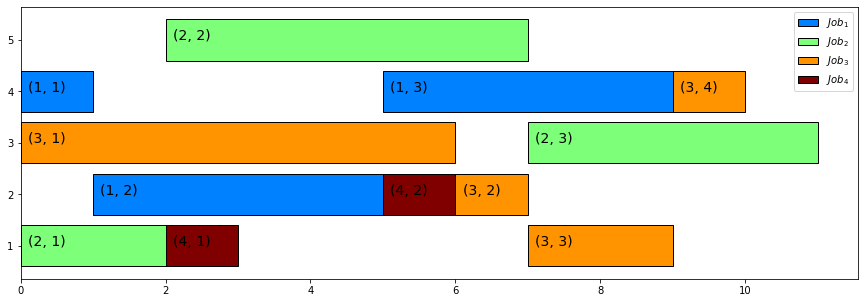

In [303]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=4)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
### PLOT Testes cor ###
labels = ["Job 1", "Job 2", "Job 3", "Job 4"]
plots = {
    1:[],
    2:[],
    3:[],
    4:[],
}
fig = plt.figure(figsize=(15,5))
for machine in range( decoder_data["quant_of_machines"] ):    # 10
  for j in range( decoder_data["half_of_scheduling"] ):       # 30
    current_start_time      = start_time[machine][j]
    current_end_time        = end_time[machine][j]
    current_diference_time  = current_end_time - current_start_time
    #if current_diference_time > 0:
    if end_time[machine][j] != 0 and end_time[machine][j] - start_time[machine][j] != 0:
      operation = find_machine_of_a_operation(j)
      bar_left  = current_start_time
      bar_width = current_diference_time
      #bar_color = colors[count]
      bar_str   = operation
      bar_str   = operation
      job = operation[0]
      plot = plt.barh(y=machine, width=bar_width, left=bar_left, color=scalarMap.to_rgba(job), edgecolor='black', label=labels[job-1])
      plots[job].append(plot)
      plt.text(x=bar_left + 0.1, y=machine, s=bar_str, fontsize=14)
      count += 1
#
#ax.yticks(np.arange(machine + 1), np.arange(1, machine + 2))
#plt.legend([1,2,3,4],["Job 1", "Job 2", "Job 3", "Job 4"])
jobs = [plots[1][0],plots[2][0],plots[3][0],plots[4][0]]
plt.legend(jobs, [r'$Job_{1}$',r'$Job_{2}$',r'$Job_{3}$',r'$Job_{4}$'])
plt.yticks(np.arange(machine + 1), np.arange(1, machine + 2))
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ('M1','M2','M3','M4','M5','M6','M7','M8','M9','M10'))

plt.show()

#Originais


In [ ]:
### PLOT Original ###

for machine in range( decoder_data["quant_of_machines"] ):    # 10
  for j in range( decoder_data["half_of_scheduling"] ):       # 30
    current_start_time      = start_time[machine][j]
    current_end_time        = end_time[machine][j]
    current_diference_time  = current_end_time - current_start_time
    #if current_diference_time > 0:
    if end_time[machine][j] != 0 and end_time[machine][j] - start_time[machine][j] != 0:
      operation = find_machine_of_a_operation(j)
      bar_left  = current_start_time
      bar_width = current_diference_time
      bar_color = colors[operation[0] - 1]
      bar_str   = operation
      plt.barh(y=machine, width=bar_width, height=0.5, left=bar_left, color=bar_color, edgecolor='black')
      plt.text(x=bar_left + 0.1, y=machine, s=bar_str, fontsize=8)
#
#ax.yticks(np.arange(machine + 1), np.arange(1, machine + 2))
#plt.yticks(np.arange(machine + 1), np.arange(1, machine + 2))

plt.show()

# Codigos Auxiliares

### Encoder / Decoder Data

#### Decoder Data

In [235]:
decoder_data = {
	"quant_of_jobs":             4,
	"quant_of_machines":         5,
	"quant_operations_per_jobs": [3, 3, 4, 2],
	"max_of_operations":         4,
	"half_of_scheduling":        12,
	"process_times":             np.load("/content/drive/MyDrive/PSO_execs/Kacem/exec7/problem1/cof5/decoder_process_times.npy")
}

### Decode Function

In [252]:
def decode(scheduling, plot_scheduling=False, fig=None):
  machines_matrix = np.zeros((decoder_data["quant_of_jobs"], decoder_data["max_of_operations"]), dtype=int)
  times_matrix    = np.zeros((decoder_data["quant_of_jobs"], decoder_data["max_of_operations"]), dtype=int)

  machines_scheduling   = scheduling[:decoder_data["half_of_scheduling"]]
  operations_scheduling = scheduling[decoder_data["half_of_scheduling"]:]

  operation_index = 0
  for i in range( decoder_data["quant_of_jobs"] ):
    for j in range( decoder_data["quant_operations_per_jobs"][i] ):
      count = 0
      process_time = decoder_data["process_times"][operation_index]

      for index in range( len(process_time) ):
        if process_time[index] != -1:
          count+=1

        if count == machines_scheduling[operation_index]:
          machines_matrix[i][j] = index+1
          times_matrix[i][j]  = process_time[index]
          break

      operation_index+=1

    #print(machines_matrix)
    #print(times_matrix)

  start_time = np.zeros(
    (decoder_data["quant_of_machines"], decoder_data["half_of_scheduling"]),
    dtype=int
  )

  end_time = np.zeros(
    (decoder_data["quant_of_machines"], decoder_data["half_of_scheduling"]),
    dtype=int
  )

  op_count_dict = {}
  machine_operations = np.zeros(decoder_data["quant_of_machines"], dtype=int)

  for os in operations_scheduling:
    if os in op_count_dict:
      op_count_dict[os] += 1
    else:
      op_count_dict[os] = 1
    #

    operation_count = op_count_dict[os]
    operation_index = find_one_operation_in_a_machine(os, operation_count)

    machine_number     = machines_matrix[os-1][operation_count-1]
    pro_time           = times_matrix [os-1][operation_count-1]

    machine_operation  = machine_operations[machine_number-1]
    current_start_time = start_time[machine_number-1][operation_index]
    current_end_time   = end_time  [machine_number-1][operation_index]

    previous_operation_index = find_one_operation_in_a_machine(os, operation_count - 1)
    previous_machine_number = machines_matrix[os-1][operation_count-2]

    if machine_operation == 0 and operation_count == 1 :
      current_start_time = 0
      current_end_time   = pro_time
    #

    elif machine_operation == 0 and operation_count > 1 :
      prev_m_num          = machines_matrix[os-1][operation_count-2]
      prev_end_time       = end_time[prev_m_num-1][previous_operation_index]
      current_start_time  = prev_end_time
      current_end_time    = prev_end_time + pro_time
    #

    elif machine_operation > 0:
      flag=0
      prev_end_time = 0

      if operation_count == 1 :
        free_start = 0
      else:
        prev_end_time = end_time[previous_machine_number-1][previous_operation_index]
        free_start = prev_end_time
      #

      order_start_time = np.sort(start_time[machine_number-1][end_time[machine_number-1] > 0])
      order_end_time   = np.sort(end_time  [machine_number-1][end_time[machine_number-1] > 0])

      for index in range(len(order_start_time)):
        if order_start_time[index] - free_start >= pro_time:
          current_start_time = free_start
          current_end_time   = free_start + pro_time
          flag = 1
          break
        #

        if order_end_time[index] - free_start >= 0:
          free_start = order_end_time[index]
        #
      #

      if flag == 0:
        free_start = max(np.max(end_time[machine_number-1]), prev_end_time)
        current_start_time = free_start
        current_end_time   = free_start + pro_time
      #
    #

    machine_operation += 1

    machine_operations[machine_number - 1]          = machine_operation
    start_time[machine_number - 1][operation_index] = current_start_time
    end_time  [machine_number - 1][operation_index] = current_end_time
  #
  
  #print(scheduling)
  if plot_scheduling:
    draw_gatt(start_time, end_time, fig)
  #

  fitness = np.max(end_time)
  #return fitness
  return (start_time, end_time)
#

### Gantt Plot Function


In [1]:
def draw_gatt(start_time, end_time, fig):
  colors = { 0:'red', 1:'blue', 2:'yellow', 3:'orange', 
    4:'green', 5:'palegoldenrod',6:'purple', 7:'pink', 
    8:'Thistle', 9:'Magenta',10:'SlateBlue', 11:'RoyalBlue', 
    12:'Cyan', 13:'Aqua',14:'floralwhite',15:'ghostwhite'
  }
  #ax = plt.figure()
  # i = Machine_index ; j = Operation_index
  for i in range( decoder_data["quant_of_machines"] ): # Vai de linha em linha do plot (começando do 0)
    for j in range( decoder_data["half_of_scheduling"] ):
      current_start_time      = start_time[i][j]
      current_end_time        = end_time[i][j]
      current_diference_time  = current_end_time - current_start_time
      #if current_diference_time > 0:
      if end_time[i][j] != 0 and end_time[i][j] - start_time[i][j] != 0:
        operation = find_machine_of_a_operation(j)
        bar_width = current_diference_time
        bar_left = current_start_time
        bar_color = colors[operation[0] - 1]
        #bar_str = operation[0] # Somente o numero do Job
        bar_str = operation     # Numero do Job e da Operação

        plt.barh(y=i, width=bar_width, height=0.5, left=bar_left, color=bar_color, edgecolor='black')
        plt.text(x=bar_left + 0.1, y=i, s=bar_str, fontsize=8)
  #
  #ax.yticks(np.arange(i + 1), np.arange(1, i + 2))
  plt.yticks(np.arange(i + 1), np.arange(1, i + 2))

  plt.show()
  pass
#

### Find Operation Function

In [2]:
def find_one_operation_in_a_machine(i, j):
  if i == 1:
    op_index = j - 1
  else:
    op_index = sum(decoder_data["quant_operations_per_jobs"][:i - 1]) + j - 1

  return op_index


----

### Find Machine

In [3]:
def find_machine_of_a_operation(operation_index):
  job_op_list = [
      (i + 1, j + 1) for i in range( decoder_data["quant_of_jobs"] ) for j in range(decoder_data["quant_operations_per_jobs"][i])
  ]
  job_op = job_op_list[operation_index]
  return job_op
#

----